In [1]:
from datetime import date

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import statsmodels.api as sm

WIDTH = 36
HEIGHT = 8

In [2]:
COUNTRIES = [
    ('Germany', 'tab:red'),
    ('Sweden', 'tab:green'),
    ('Italy', 'tab:orange'),
    #('Austria', 'tab:brown'),
    ('United Kingdom', 'tab:gray'), 
    ('Spain', 'tab:pink'),
    ('US', 'tab:blue'),
    #('China', 'tab:olive'),
    #('Korea, South', 'tab:cyan'),
    ('France', 'tab:cyan'),
    #('Singapore', 'tab:purple')
]

In [3]:
def rebin(df_in):
    # rebin values for each country
    countries = set(df_in['Country/Region'])

    xlength = len(countries)
    ylength = df_in.shape[1] - 4

    data = np.ones((ylength, xlength), dtype=float)
    df = pd.DataFrame(data, index=np.arange(ylength), columns=countries)

    for row in df_in.to_numpy():
        country = row[1]

        for i, n in enumerate(row[4:]):
            df[country][i] += n

    return df

In [4]:
def plot(df, a=-3, b=-1, c=3, ymin=100, ymax=10000000, title=None):

    xmin = -270
    xmax = c

    fig, ax = plt.subplots()

    for country, color in COUNTRIES:    
        x = df[country].index - df[country].index[-1]
        y = df[country]

        model = sm.OLS(np.log10(y[a:b]), sm.add_constant(x[a:b]))
        results = model.fit()
        params = results.params
        x_fit = np.arange(x[a], x[b] + 1 + c)
        y_fit = np.power(10, params[1] * x_fit + params[0])
        
        label = '{} ({})'.format(country, int(df[country][df.shape[0] - 1]))

        plt.semilogy(x, y, label=label, linestyle='--', marker='s', color=color)
        plt.semilogy(x_fit, y_fit, linestyle='-', color=color)

    if title:
        ax.set_title(title)
        
    ax.grid(True, which="major", color='black')
    ax.grid(True, which="minor", linestyle='--')
    ax.set_xlim([xmin,xmax])
    ax.set_ylim([ymin,ymax])
    ax.set_xlabel('days since {}'.format(date.today()))
    ax.set_ylabel('number of cases')
    ax.set_xticks(np.arange(xmin, xmax + 1, 7))
    ax.set_xticks(np.arange(xmin, xmax), minor=True)
    ax.legend(loc='upper left')

    fig = plt.gcf()
    fig.set_size_inches(WIDTH, HEIGHT)

In [5]:
def plot_new(df, ymin=100, ymax=100000, title=None):
    xmin = -270
    xmax = 0
    
    fig, ax = plt.subplots()
    
    for country, color in COUNTRIES:
        n = df[country].shape[0] - 1
        x = df[country].index[1:] - df[country].index[-1] 
        y = np.array([df[country][i+1] - df[country][i] for i in range(n)])
        
        label = '{} ({})'.format(country, int(y[-1]))
        
        plt.semilogy(x, y, label=label, linestyle='--', marker='s', color=color)
        
    if title:
        ax.set_title(title)

    ax.grid(True, which="major", color='black')
    ax.grid(True, which="minor", linestyle='--')
    ax.set_xlim([xmin,xmax])
    ax.set_ylim([ymin,ymax])
    ax.set_xlabel('days since {}'.format(date.today()))
    ax.set_ylabel('number of new cases')
    ax.set_xticks(np.arange(xmin, xmax + 1, 7))
    ax.set_xticks(np.arange(xmin, xmax), minor=True)
    ax.legend(loc='upper left')

    fig = plt.gcf()
    fig.set_size_inches(WIDTH, HEIGHT)

In [6]:
def plot_new_mean(df, ymin=100, ymax=100000, window=7, title=None):
    xmin = -270
    xmax = 0
    
    fig, ax = plt.subplots()
    
    for country, color in COUNTRIES:
        n = df[country].shape[0] - 1

        i0 = window // 2
        x = df[country].index[i0:-window+i0] - df[country].index[-1]
        
        y_list = []
        for i in range(df[country].shape[0] - window):
            mean = 0
            for j in range(i, i + window):
                mean += (df[country][j+1] - df[country][j])
            y_list.append(mean / float(window))

        y = np.array(y_list)
        
        label = '{} ({})'.format(country, int(y[-1]))
        
        plt.semilogy(x, y, label=label, linestyle='--', marker='s', color=color)
        
    if title:
        ax.set_title(title)

    ax.grid(True, which="major", color='black')
    ax.grid(True, which="minor", linestyle='--')
    ax.set_xlim([xmin,xmax])
    ax.set_ylim([ymin,ymax])
    ax.set_xlabel('days since {}'.format(date.today()))
    ax.set_ylabel('number of new cases')
    ax.set_xticks(np.arange(xmin, xmax + 1, 7))
    ax.set_xticks(np.arange(xmin, xmax), minor=True)
    ax.legend(loc='upper left')

    fig = plt.gcf()
    fig.set_size_inches(WIDTH, HEIGHT)

In [7]:
path = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df_in = pd.read_csv(path)
df = rebin(df_in)

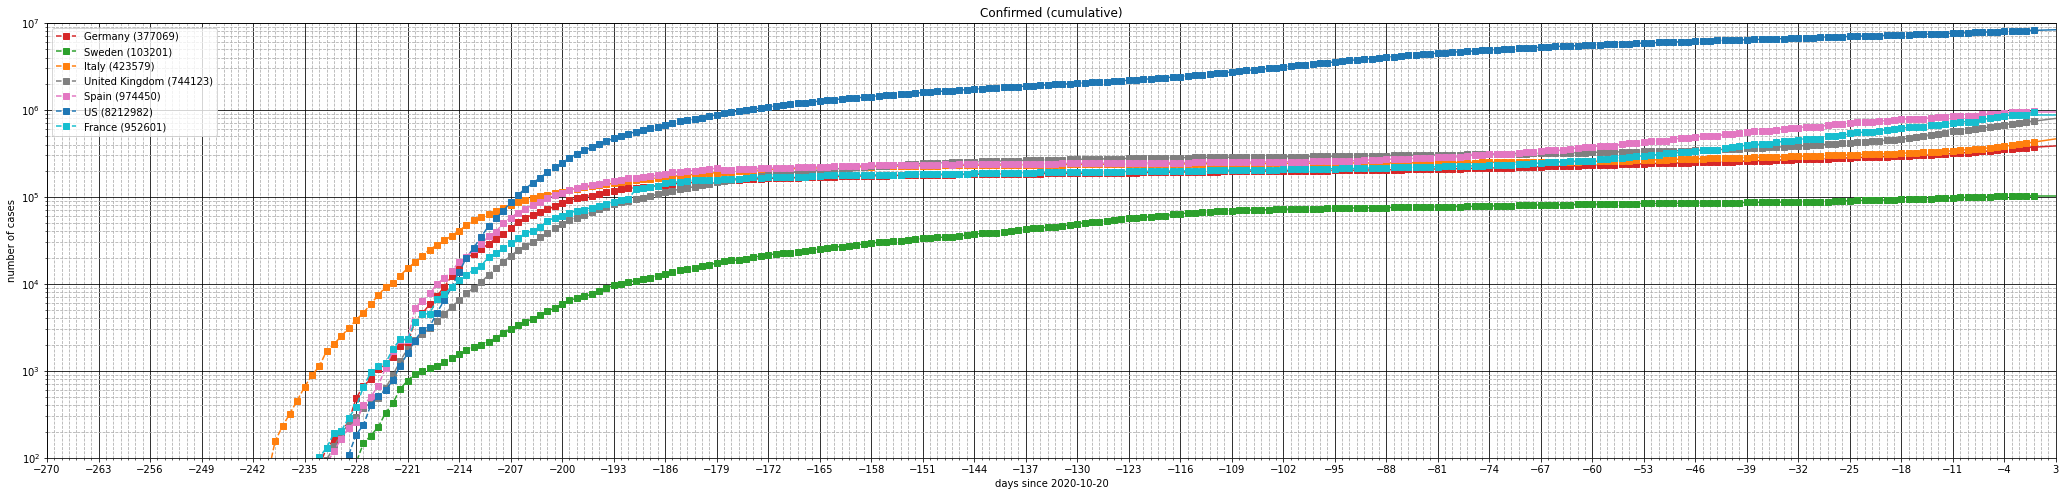

In [8]:
plot(df, title='Confirmed (cumulative)')

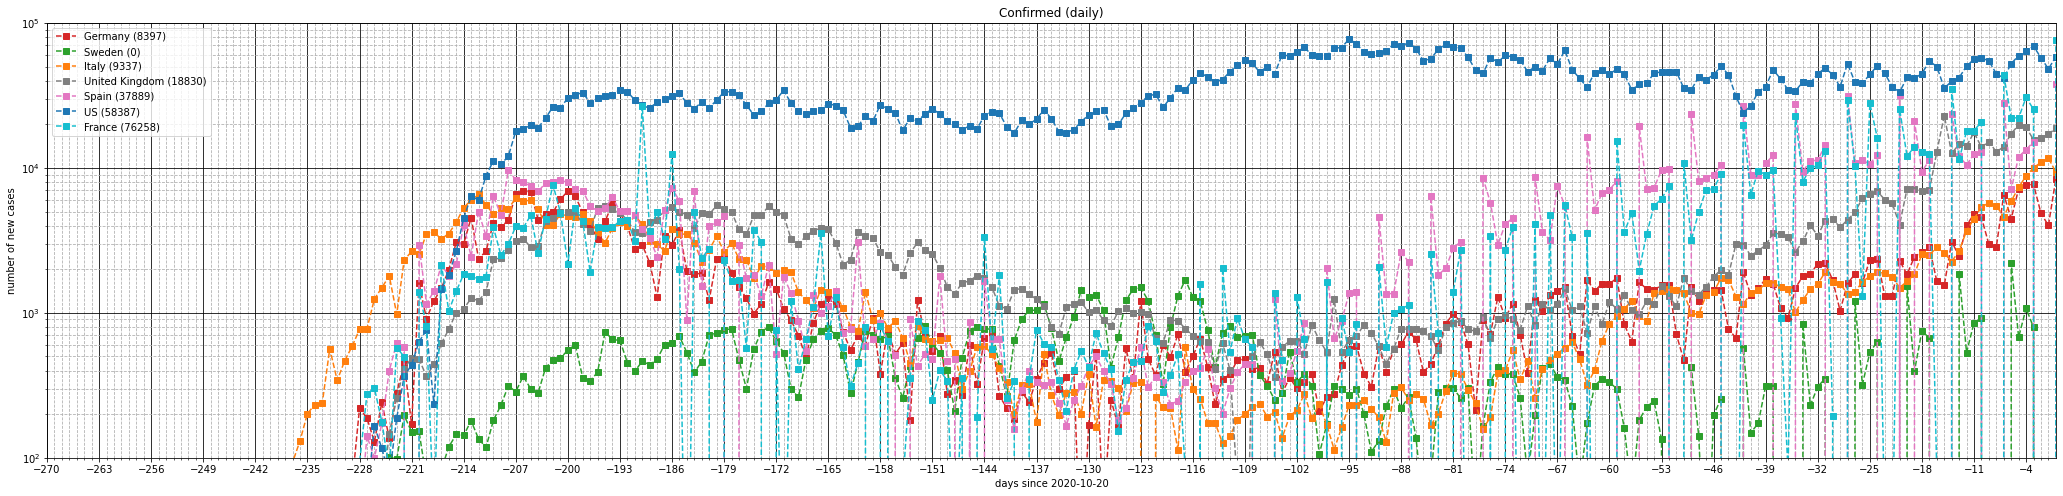

In [9]:
plot_new(df, title='Confirmed (daily)')

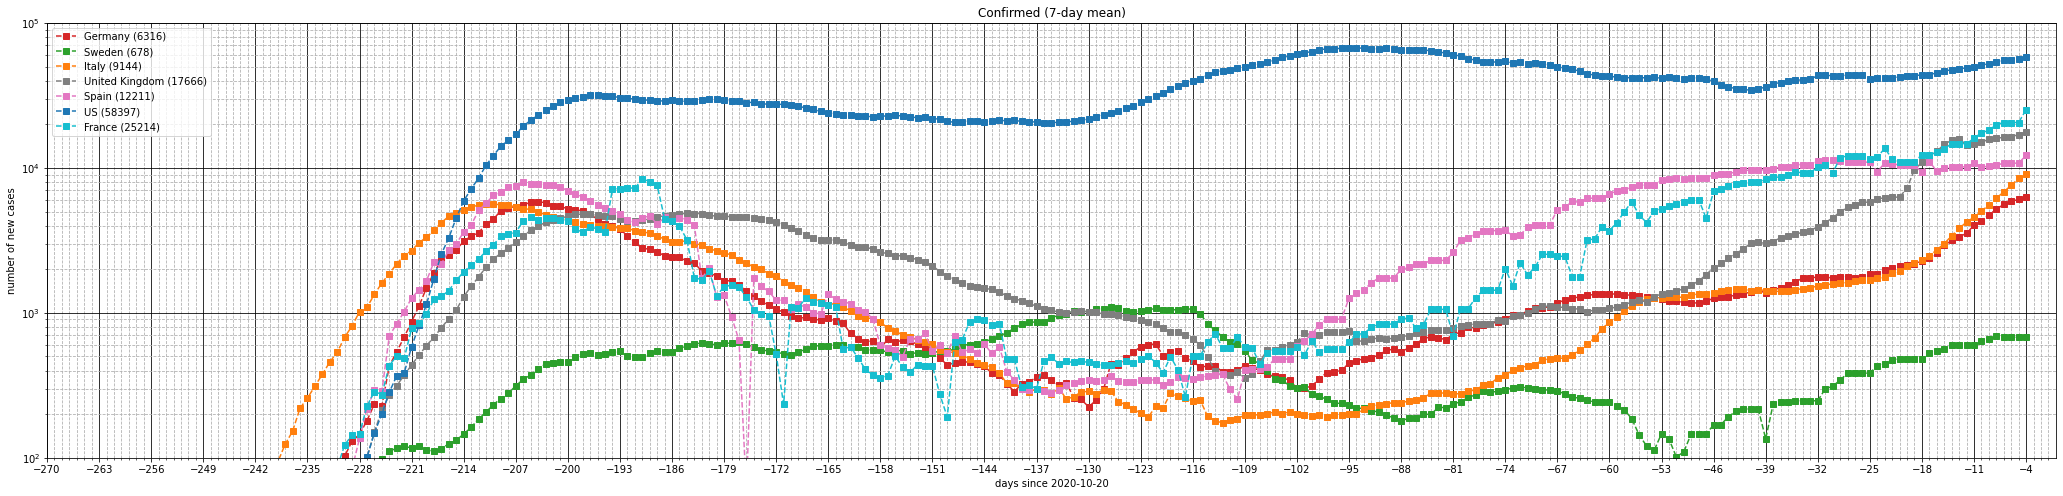

In [10]:
plot_new_mean(df, window=7, title='Confirmed (7-day mean)')

In [11]:
path = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df_in = pd.read_csv(path)
df = rebin(df_in)

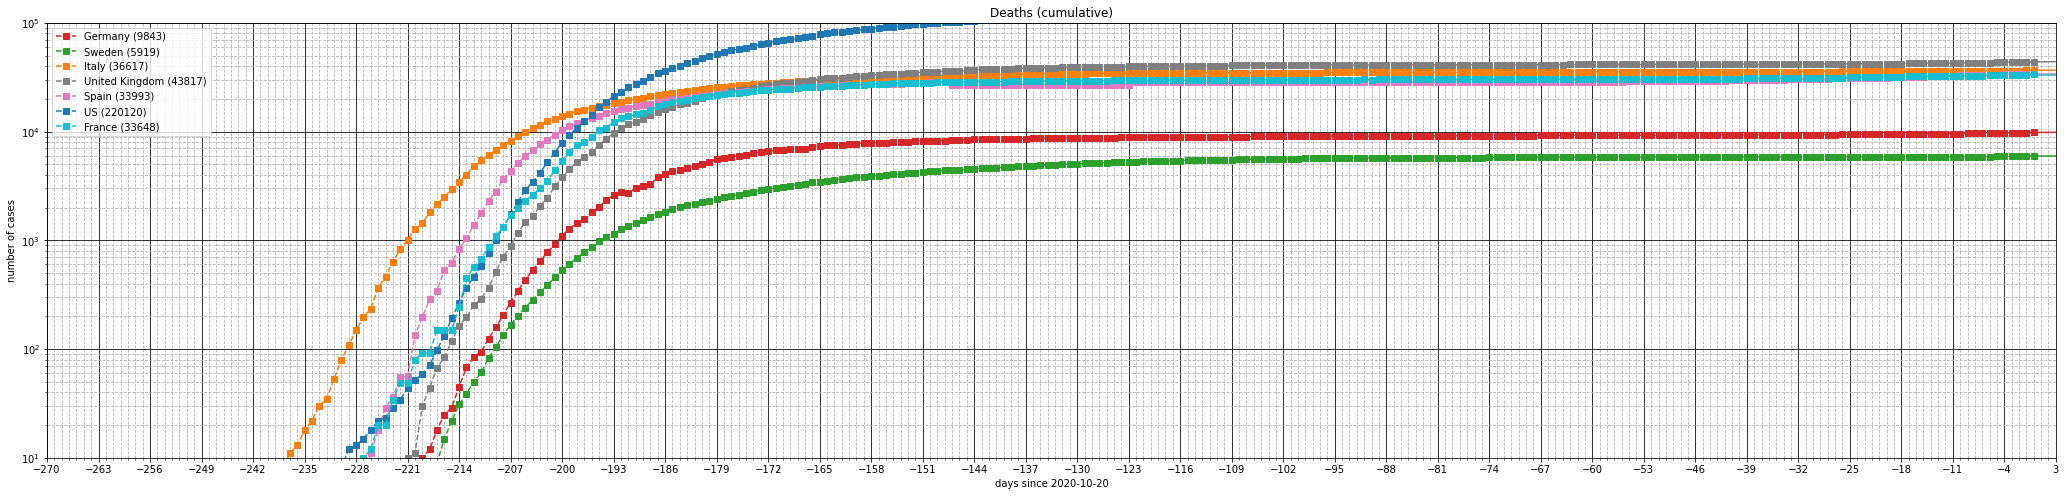

In [12]:
plot(df, ymin=10, ymax=100000, title='Deaths (cumulative)')

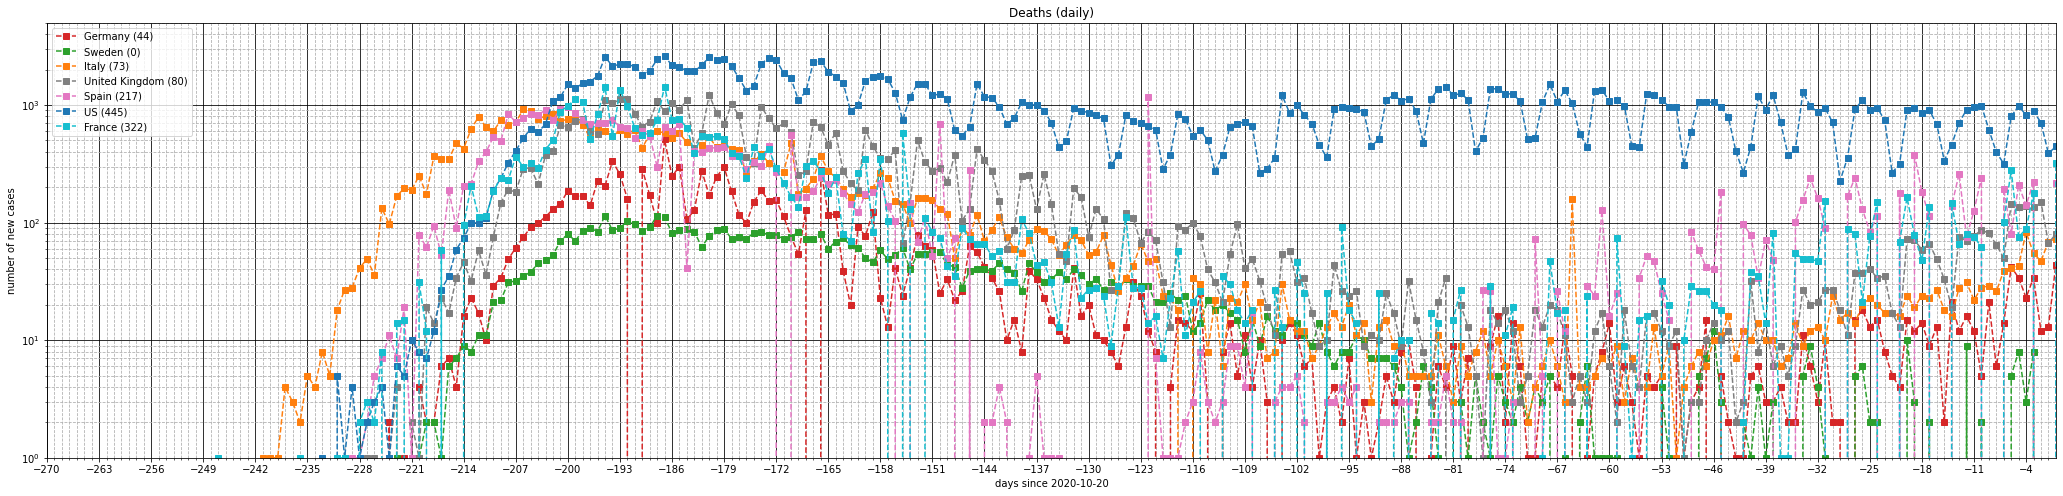

In [13]:
plot_new(df, ymin=1, ymax=5000, title='Deaths (daily)')

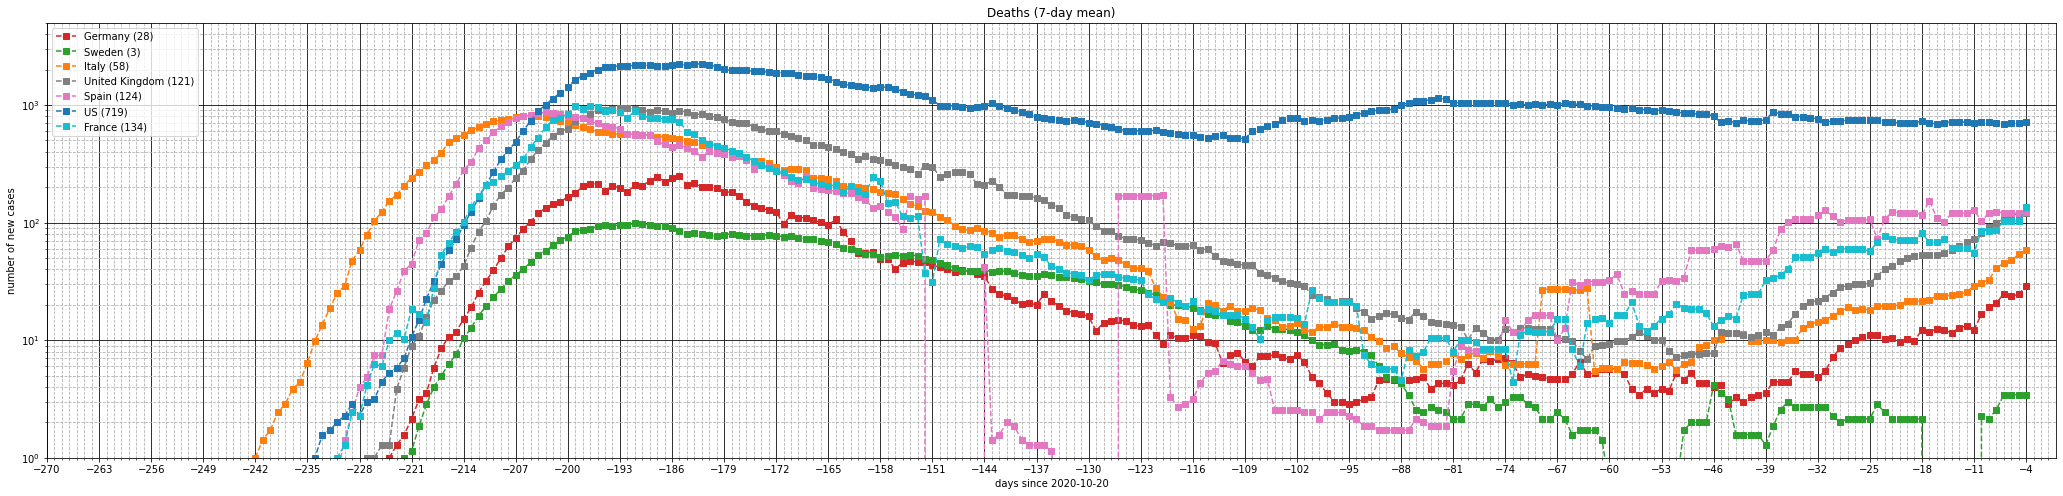

In [14]:
plot_new_mean(df, ymin=1, ymax=5000, window=7, title='Deaths (7-day mean)')

In [15]:
path = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
df_in = pd.read_csv(path)
df = rebin(df_in)

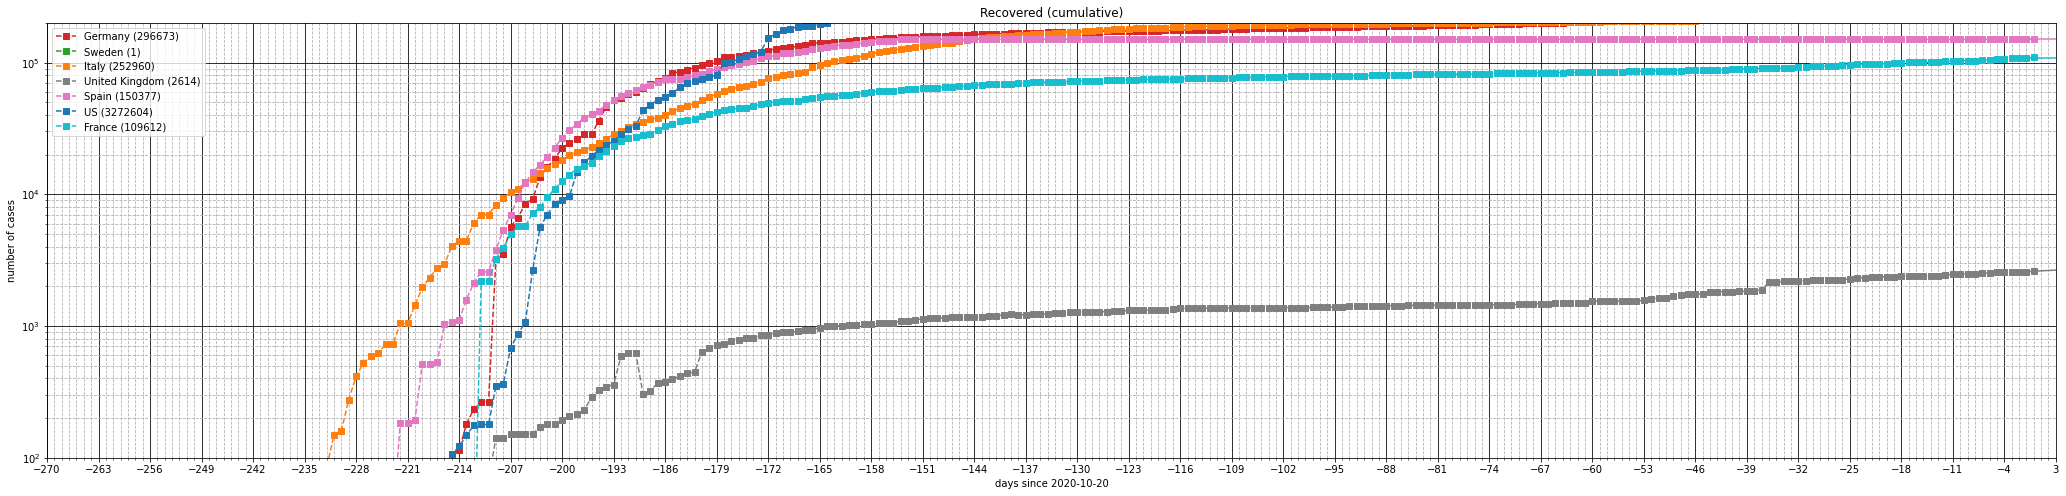

In [16]:
plot(df, ymax=200000, title='Recovered (cumulative)')

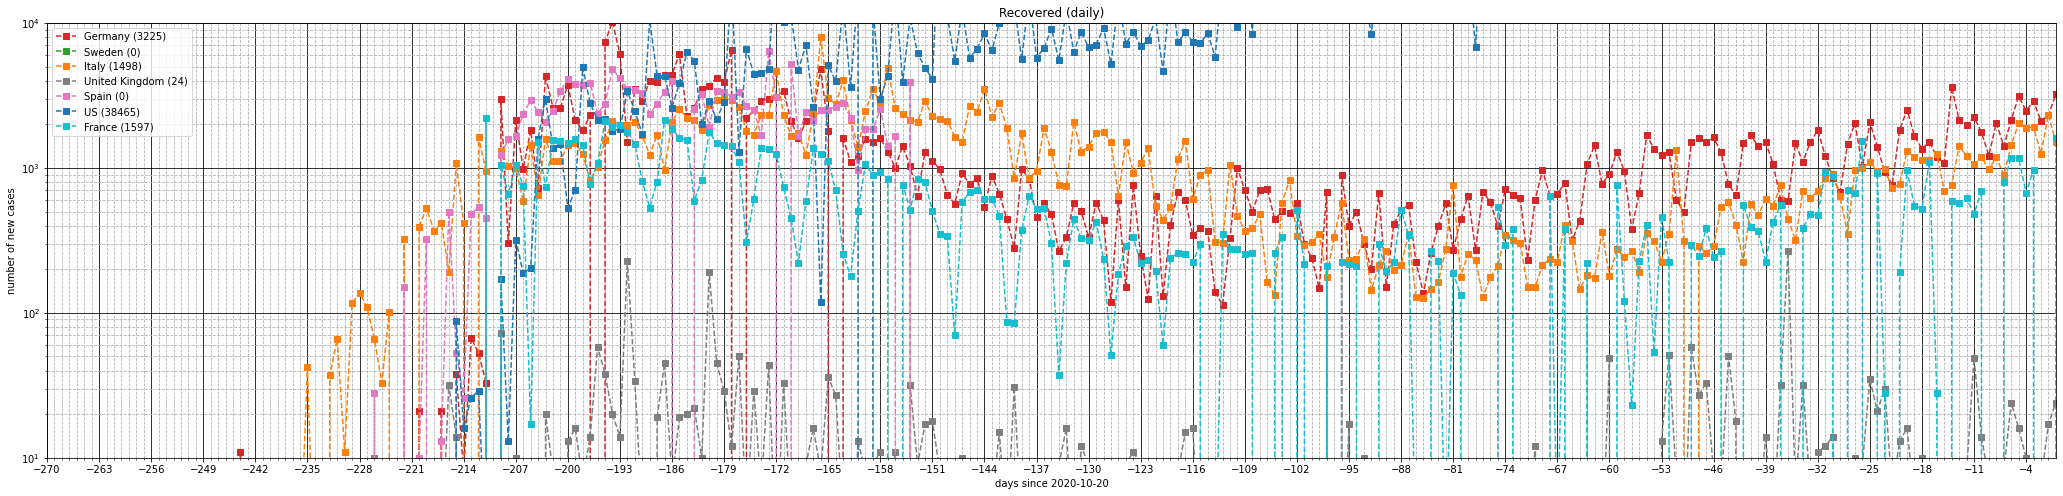

In [17]:
plot_new(df, ymin=10, ymax=10000, title='Recovered (daily)')

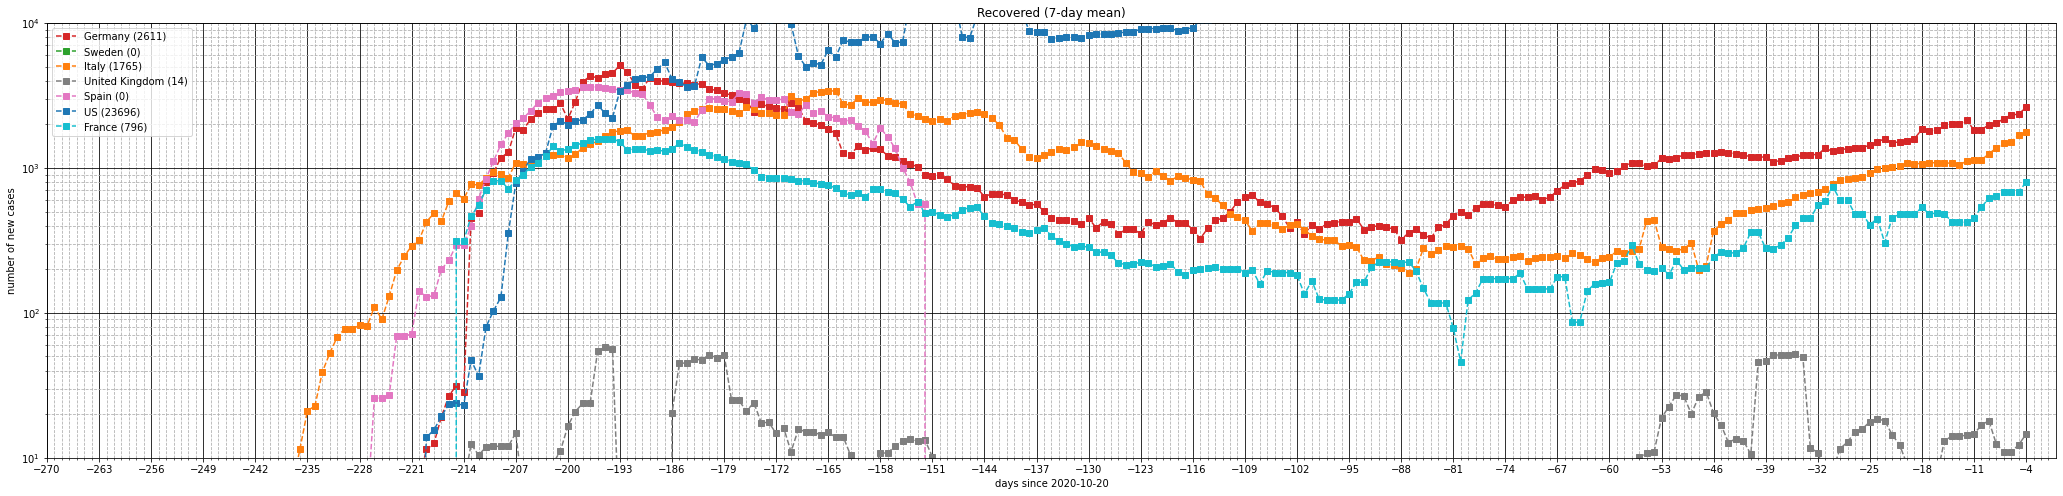

In [18]:
plot_new_mean(df, ymin=10, ymax=10000, window=7, title='Recovered (7-day mean)')